# Assignment 2

### Group 11  
Michael Hüppe, Leon Korkmaz

## Task: 3 Image pyramids

In [25]:
import numpy as np
from skimage import io, color
from skimage.transform import pyramid_gaussian, resize
import matplotlib.pyplot as plt

In [26]:
image_path = "visual_attention.png"
image = io.imread(image_path)

image = color.rgb2gray(color.rgba2rgb(image))

sigma_center = 9
sigma_surround = 16
max_layers = 4

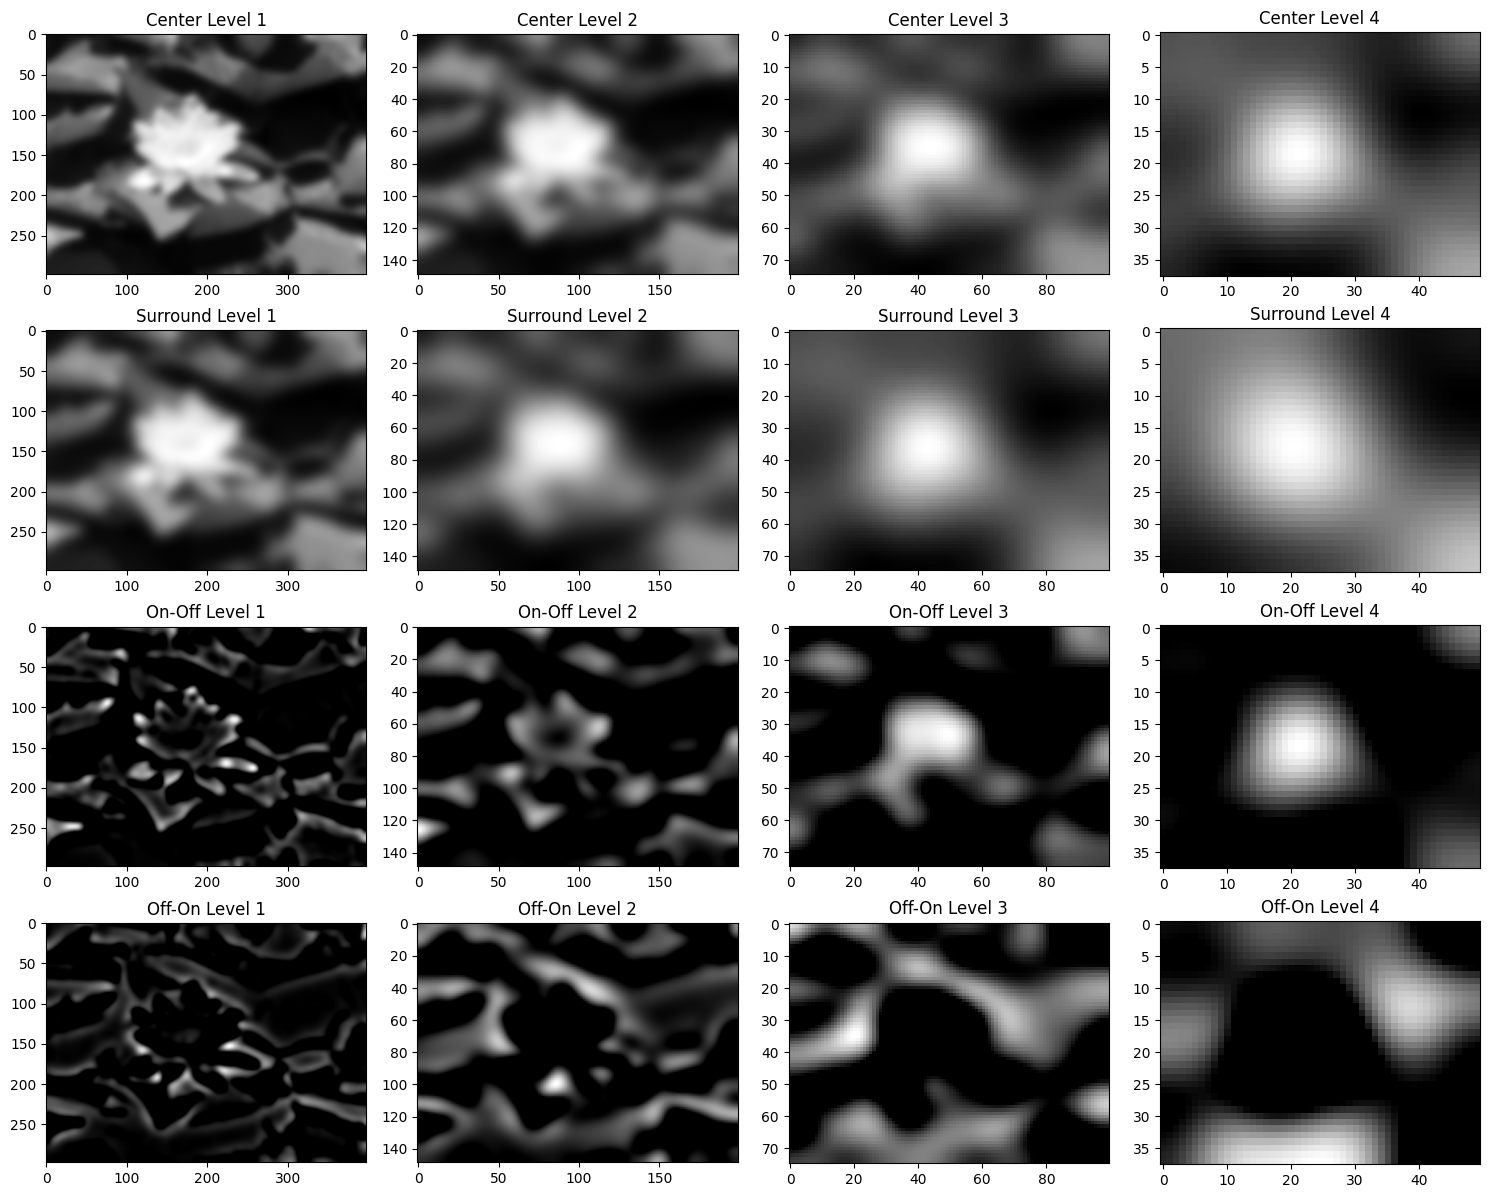

In [ ]:
# Generate gaussian pyramids
center_pyramid = list(pyramid_gaussian(image, max_layer=max_layers, sigma=sigma_center))
surround_pyramid = list(pyramid_gaussian(image, max_layer=max_layers, sigma=sigma_surround))

# Calculate On-Off and Off-On contrast pyramids
on_off_pyramid = [np.clip(C - S, 0, 1) for C, S in zip(center_pyramid, surround_pyramid)]
off_on_pyramid = [np.clip(S - C, 0, 1) for C, S in zip(center_pyramid, surround_pyramid)]


fig, axs = plt.subplots(4, max_layers, figsize=(15, 12))

for i in range(max_layers):
    level = i + 1

    axs[0, i].imshow(center_pyramid[level], cmap='gray')
    axs[0, i].set_title(f"Center Level {level}")

    axs[1, i].imshow(surround_pyramid[level], cmap='gray')
    axs[1, i].set_title(f"Surround Level {level}")

    axs[2, i].imshow(on_off_pyramid[level], cmap='gray')
    axs[2, i].set_title(f"On-Off Level {level}")

    axs[3, i].imshow(off_on_pyramid[level], cmap='gray')
    axs[3, i].set_title(f"Off-On Level {level}")

plt.tight_layout()
plt.show()

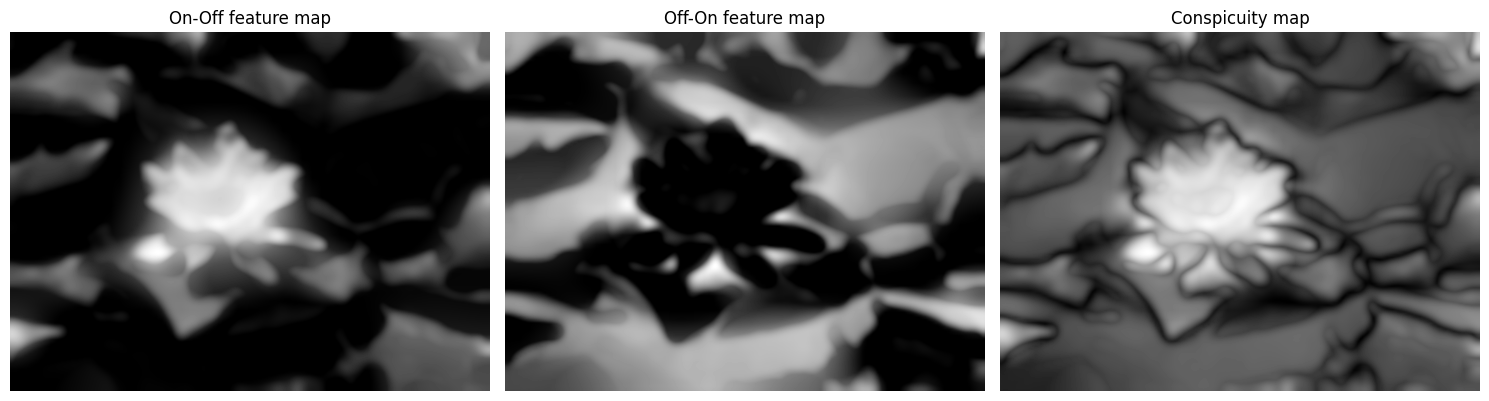

In [ ]:
# Upsample pyramid layers with skimage resize
def upsample_pyramid(pyramid):
    base_size = pyramid[0].shape
    upsampled_pyramid = [resize(layer, base_size, mode='reflect', anti_aliasing=True) for layer in pyramid]
    return upsampled_pyramid

upsampled_on_off = upsample_pyramid(on_off_pyramid)
upsampled_off_on = upsample_pyramid(off_on_pyramid)

# Compute feature maps by averaging across all layers
def compute_feature_map(upsampled_pyramid):
    stacked_layers = np.stack(upsampled_pyramid, axis=0)
    feature_map = np.mean(stacked_layers, axis=0) 
    return feature_map

feature_map_on_off = compute_feature_map(upsampled_on_off)
feature_map_off_on = compute_feature_map(upsampled_off_on)

# Compute the conspicuity map
conspicuity_map = (feature_map_on_off + feature_map_off_on) / 2

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(feature_map_on_off, cmap='gray')
axs[0].set_title("On-Off feature map")
axs[0].axis("off")

axs[1].imshow(feature_map_off_on, cmap='gray')
axs[1].set_title("Off-On feature map")
axs[1].axis('off')

axs[2].imshow(conspicuity_map, cmap='gray')
axs[2].set_title("Conspicuity map")
axs[2].axis('off')


plt.tight_layout()
plt.show()


This approach based on image pyramids allows us to build a conspicuity map with clear edges and doesn't require padding.